In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def readdata(file):
    dataframe = pd.read_csv(file)
    dataframe.fillna(dataframe.mean(), inplace=True)
    print(dataframe)
    return dataframe

In [4]:
dataframe = readdata('train_linear_regression.csv')
dataframe

      OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0               7       1820           1         240         1026      1133   
1               7       1646           1         240          918       918   
2               5       1316           2         484          926       926   
3              10       2402           3         672         3094      2402   
4               7       1253           2         402         1237      1253   
...           ...        ...         ...         ...          ...       ...   
1163            6       1400           2         440          672       672   
1164            7       1472           2         402          384       802   
1165            5        789           1         250          789       789   
1166            6       1661           1         377          992      1661   
1167            7       1442           2         500         1424      1442   

      FullBath  TotRmsAbvGrd  YearBuilt  YearRemodA

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1820,1,240,1026,1133,2,8,1925,1950,184000
1,7,1646,1,240,918,918,2,7,1941,1950,164000
2,5,1316,2,484,926,926,1,6,1929,2001,130000
3,10,2402,3,672,3094,2402,2,10,2008,2008,555000
4,7,1253,2,402,1237,1253,2,6,1995,1996,176000
...,...,...,...,...,...,...,...,...,...,...,...
1163,6,1400,2,440,672,672,1,6,1978,1978,149500
1164,7,1472,2,402,384,802,2,7,1991,1992,160000
1165,5,789,1,250,789,789,1,5,1948,1950,115000
1166,6,1661,1,377,992,1661,1,8,1955,1996,165500


In [5]:
def scaledata(dataframe):
    means = dataframe.mean()
    standard_deviations = dataframe.std()
    scaled_dataframe = (dataframe - means) / standard_deviations
    features = scaled_dataframe.to_numpy()
    return scaled_dataframe

In [6]:
scaled_dataframe = scaledata(dataframe)
scaled_dataframe

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,0.656409,0.569608,-1.044836,-1.111755,-0.069209,-0.084179,0.791341,0.928126,-1.515070,-1.676737,0.034756
1,0.656409,0.237557,-1.044836,-1.111755,-0.312009,-0.638238,0.791341,0.297130,-0.988295,-1.676737,-0.215609
2,-0.810932,-0.392195,0.303637,0.036325,-0.294024,-0.617622,-1.049867,-0.333866,-1.383377,0.786878,-0.641230
3,2.857421,1.680261,1.652111,0.920911,4.579950,3.186057,0.791341,2.190119,1.217576,1.125021,4.679025
4,0.656409,-0.512420,0.303637,-0.349505,0.405149,0.225063,0.791341,-0.333866,0.789571,0.545347,-0.065390
...,...,...,...,...,...,...,...,...,...,...,...
1163,-0.077262,-0.231894,0.303637,-0.170706,-0.865052,-1.272184,-1.049867,-0.333866,0.229872,-0.324164,-0.397124
1164,0.656409,-0.094494,0.303637,-0.349505,-1.512517,-0.937172,0.791341,0.297130,0.657877,0.352122,-0.265682
1165,-0.810932,-1.397889,-1.044836,-1.064703,-0.602019,-0.970673,-1.049867,-0.964862,-0.757831,-1.676737,-0.829003
1166,-0.077262,0.266182,-1.044836,-0.467137,-0.145646,1.276487,-1.049867,0.928126,-0.527367,0.545347,-0.196832


In [7]:
target_column = scaled_dataframe['SalePrice']
features = scaled_dataframe.iloc[:, :-1].to_numpy()
targets = target_column.to_numpy()
print(features)
print(targets)

[[ 0.65640899  0.56960799 -1.0448359  ...  0.92812629 -1.51507048
  -1.67673683]
 [ 0.65640899  0.23755709 -1.0448359  ...  0.29713007 -0.98829534
  -1.67673683]
 [-0.81093206 -0.3921946   0.30363739 ... -0.33386615 -1.3833767
   0.78687768]
 ...
 [-0.81093206 -1.39788896 -1.0448359  ... -0.96486237 -0.75783121
  -1.67673683]
 [-0.07726154  0.26618217 -1.0448359  ...  0.92812629 -0.52736709
   0.54534685]
 [ 0.65640899 -0.15174395  0.30363739 ... -0.96486237  0.62495354
   0.25550984]]
[ 0.03475576 -0.21560915 -0.6412295  ... -0.82900319 -0.19683178
 -0.0090581 ]


In [8]:
def accuracy(features, targets, weights, bias):
    predictions = np.dot(features, weights) + bias
    residual_square_sum = np.sum((targets - predictions) ** 2)
    total_square_sum = np.sum((targets - np.mean(targets)) ** 2)
    r_squared = 1 - (residual_square_sum / total_square_sum)

    return r_squared

In [9]:
def gradient_descent(features, targets, learning_rate=0.01, epochs=100):
    bias = 0
    weights = np.zeros(features.shape[1])

    mean_square_errors = np.empty(epochs)
    r_squareds = np.empty(epochs)

    for iternum in range(epochs):
        errors = np.dot(features, weights) + bias - targets
        
        mean_square_errors[iternum] = (0.5 / len(features)) * np.sum(errors ** 2)
        r_squareds[iternum] = accuracy(features, targets, weights, bias)
        
        weight_gradient = (1 / len(features)) * np.dot(features.T, errors)
        bias_gradient = (1 / len(features)) * np.sum(errors)

        weights -= learning_rate * weight_gradient
        bias -= learning_rate * bias_gradient

    return weights, bias, mean_square_errors, r_squareds

In [10]:
weights, bias, mse, r2 = gradient_descent(features, targets)
print(weights)
print(bias)

[0.20333641 0.16651716 0.10472596 0.10312208 0.11808917 0.10726515
 0.06819907 0.09648892 0.08938071 0.09276308]
-2.4546955031789286e-16


In [11]:
def graphing(mean_square_errors, r_squareds):
    epoch = range(len(mean_square_errors))

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epoch, mean_square_errors)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.title('MSE v Epoch')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epoch, r_squareds)
    plt.xlabel('Epoch')
    plt.ylabel('R^2')
    plt.title('R^2 v Epoch')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

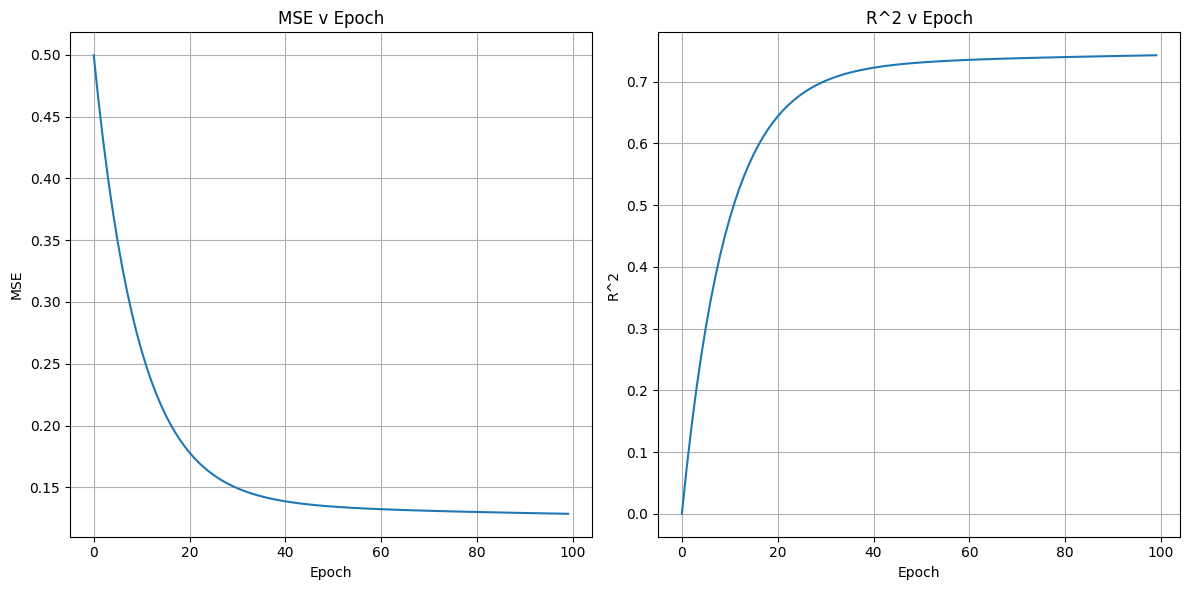

In [12]:
graphing(mse, r2)

In [13]:
testingframe = readdata('test_linear_regression.csv')
testingframe

     OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0              8       1970           3         753         1085      1120   
1              6       1632           1         338         1240      1632   
2              7       1223           2         480          600       520   
3              5       1559           2         812         1559      1559   
4              4        630           1         286          630       630   
..           ...        ...         ...         ...          ...       ...   
287            6       1158           2         576         1158      1158   
288            6        987           1         264          483       483   
289            6        848           2         420          848       848   
290            7       1266           2         388         1266      1266   
291            6       1484           2         393          783       783   

     FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  SalePrice

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,8,1970,3,753,1085,1120,2,8,2006,2006,281000
1,6,1632,1,338,1240,1632,2,6,1958,1988,139000
2,7,1223,2,480,600,520,2,4,2005,2005,147400
3,5,1559,2,812,1559,1559,1,5,1948,1973,153500
4,4,630,1,286,630,630,1,3,1970,2002,86000
...,...,...,...,...,...,...,...,...,...,...,...
287,6,1158,2,576,1158,1158,1,5,2004,2004,158000
288,6,987,1,264,483,483,1,5,1972,2007,118000
289,6,848,2,420,848,848,1,4,2003,2003,140000
290,7,1266,2,388,1266,1266,2,6,2007,2007,159895


In [14]:
scaled_testingframe = scaledata(testingframe)
scaled_testingframe

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,1.316089,0.900724,1.640400,1.340694,0.060355,-0.079956,0.783197,0.857727,1.141909,1.003420,1.302293
1,-0.051519,0.264803,-0.955789,-0.556822,0.434660,1.263463,0.783197,-0.265395,-0.482964,0.122957,-0.523441
2,0.632285,-0.504697,0.342306,0.092449,-1.110856,-1.654276,0.783197,-1.388518,1.108058,0.954505,-0.415439
3,-0.735324,0.127460,0.342306,1.610461,1.205003,1.071921,-0.936303,-0.826957,-0.821479,-0.610763,-0.337010
4,-1.419128,-1.620380,-0.955789,-0.794583,-1.038410,-1.365650,-0.936303,-1.950080,-0.076746,0.807761,-1.204876
...,...,...,...,...,...,...,...,...,...,...,...
287,-0.051519,-0.626990,0.342306,0.531392,0.236641,0.019751,-0.936303,-0.826957,1.074206,0.905591,-0.279152
288,-0.051519,-0.948713,-0.955789,-0.895174,-1.393396,-1.751359,-0.936303,-0.826957,-0.009043,1.052335,-0.793443
289,-0.051519,-1.210230,0.342306,-0.181891,-0.511969,-0.793648,-0.936303,-1.388518,1.040355,0.856676,-0.510583
290,0.632285,-0.423796,0.342306,-0.328205,0.497446,0.303128,0.783197,-0.265395,1.175761,1.052335,-0.254788


In [15]:
target_column = scaled_testingframe['SalePrice']
features = scaled_testingframe.iloc[:, :-1].to_numpy()
targets = target_column.to_numpy()
print(features)
print(targets)

[[ 1.31608894  0.90072359  1.64040041 ...  0.85772728  1.1419093
   1.00341989]
 [-0.0515195   0.26480348 -0.95578886 ... -0.26539544 -0.48296387
   0.12295663]
 [ 0.63228472 -0.50469748  0.34230578 ... -1.38851815  1.10805778
   0.95450527]
 ...
 [-0.0515195  -1.21023014  0.34230578 ... -1.38851815  1.04035473
   0.85667602]
 [ 0.63228472 -0.4237964   0.34230578 ... -0.26539544  1.17576082
   1.05233452]
 [-0.0515195  -0.01364674  0.34230578 ...  0.85772728  1.10805778
   1.05233452]]
[ 1.30229293e+00 -5.23440520e-01 -4.15439386e-01 -3.37009992e-01
 -1.20487625e+00 -6.71299216e-01 -6.71299216e-01  3.70787161e-03
 -2.20066841e-02 -3.39105728e-01  5.75856736e-01 -5.55583715e-01
 -4.72011409e-01 -3.37009992e-01  8.00859099e-01 -7.04728138e-01
  4.53712597e-01 -2.02008574e-01 -4.46296853e-01 -3.91010559e-01
 -9.27217123e-02  6.46571764e-01 -5.99316469e-04 -5.74869632e-01
  5.43713542e-01 -1.90437024e-01  2.33853145e-01 -8.57729745e-01
 -4.01296381e-01  6.79942609e-02  1.50800938e+00  6.33

In [16]:
testing_accuracy = accuracy(features, targets, weights, bias)
print(f"{testing_accuracy * 100}%")

79.08692469801396%
